# Globalization

In [36]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
mod = sys.modules[__name__]

from pandas import ExcelWriter
import math

from convergence import ConvergenceAnalysis as ca

In [3]:
# Load Data and Region Rule
ccode = pd.read_csv('Code_country.csv')
using_country = pd.read_csv('Using_GNI.csv')
df = pd.read_csv('globalization2018.csv')
wb = pd.read_csv('classification.csv')

In [4]:
ccode.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2015,GNI_G
0,Norway,NOR,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,93560.0,4
1,Switzerland,CHE,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,84540.0,4
2,Qatar,QAT,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,75660.0,4
3,Luxembourg,LUX,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,71240.0,4
4,"Macao SAR, China",MAC,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,64580.0,4


In [8]:
print(using_country.shape)
using_country.head()

(141, 1)


,Country
0,Benin
1,Burkina Faso
2,Burundi
3,Central African Republic
4,Chad


In [9]:
df.head()

,a,ai,aii,b,bi,bii,biii,c,code,country,index,year,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,44.212093,NaN,60.106384,89.079720,49.66404,49.74778,3.179766,ABW,Aruba,35.554974,1970.0,NaN,NaN,NaN
1,NaN,44.212093,NaN,60.029732,88.789581,49.66404,49.74778,3.179766,ABW,Aruba,35.511379,1971.0,NaN,NaN,NaN
2,NaN,44.212093,NaN,60.029732,88.789581,49.66404,49.74778,3.179766,ABW,Aruba,35.511379,1972.0,NaN,NaN,NaN
3,NaN,44.212093,NaN,60.029732,88.789581,49.66404,49.74778,3.179766,ABW,Aruba,35.511379,1973.0,NaN,NaN,NaN
4,NaN,44.212093,NaN,60.029732,88.789581,49.66404,49.74778,3.179766,ABW,Aruba,35.511379,1974.0,NaN,NaN,NaN


In [10]:
wb.head()

,country,code,region
0,Afghanistan,AFG,South Asia
1,Albania,ALB,Europe & Central Asia
2,Algeria,DZA,Middle East & North Africa
3,American Samoa,ASM,East Asia & Pacific
4,Andorra,AND,Europe & Central Asia


In [22]:
# The total countries to be analyzed are 141
li = []
for ind, name in enumerate(ccode['Country Name']):
    if name not in using_country.values.ravel():
        li.append(ind)
for i in li:
    ccode = ccode.drop(i)
    
ccode.index = range(len(ccode))

ccode.loc[140] = ['Cape Verde', 
                  'CPV', 
                  'GNI per capita, Atlas method (current US$)',
                  'NY.GNP.PCAP.CD',
                  '3150',
                  2]
print(ccode.shape)
ccode.head()

(141, 6)


,Country Name,Country Code,Indicator Name,Indicator Code,2015,GNI_G
0,Norway,NOR,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,93560,4
1,Switzerland,CHE,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,84540,4
2,Qatar,QAT,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,75660,4
3,Luxembourg,LUX,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,71240,4
4,Australia,AUS,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,60330,4


In [26]:
df = df[df.columns[:-3]].dropna(axis=0)
print(df.shape)
df.head()

(6524, 12)


,a,ai,aii,b,bi,bii,biii,c,code,country,index,year
143,53.620373,38.950787,68.289955,6.412741,8.366130,10.086908,1.0,31.975620,AGO,Angola,30.197998,1975.0
144,53.620373,38.950787,68.289955,6.478923,8.547670,10.086908,1.0,43.979813,AGO,Angola,33.573734,1976.0
145,53.620373,38.950787,68.289955,6.712841,9.189314,10.086908,1.0,46.143536,AGO,Angola,34.263924,1977.0
146,53.620373,38.950787,68.289955,6.946758,9.830957,10.086908,1.0,47.505890,AGO,Angola,34.730389,1978.0
147,53.620373,38.950787,68.289955,7.012940,10.012497,10.086908,1.0,37.151997,AGO,Angola,31.864119,1979.0


In [28]:
others = (set(df.code.unique()) - set(ccode['Country Code'].unique()))
df = df[df.code.map(lambda x : x not in others)]

In [29]:
df = df[df.year > 1990]

In [30]:
mapping_gni = {i:j for i,j in zip(ccode['Country Name'], ccode['GNI_G'])}
df['GNI'] = df.country.map(lambda x : mapping_gni[x])

In [31]:
mapping_region = {i:j for i,j in zip(wb['code'], wb['region'])}
df['region'] = df.code.map(lambda x : mapping_region[x])

In [32]:
print(df.region.value_counts() / len(df.year.unique()))

Europe & Central Asia         41.0
Sub-Saharan Africa            38.0
Latin America & Caribbean     25.0
East Asia & Pacific           16.0
Middle East & North Africa    14.0
South Asia                     5.0
North America                  2.0
Name: region, dtype: float64


In [33]:
change_region_name = {
    'Sub-Saharan Africa' : 'SaSsa',
    'Europe & Central Asia' : 'EcaNa',
    'Latin America & Caribbean' : 'Lac', 
    'East Asia & Pacific' : 'Eap', 
    'South Asia' : 'SaSsa',
    'Middle East & North Africa' : 'Mena', 
    'North America' : 'EcaNa'
}
df['region'] = df.region.map(lambda x : change_region_name[x])

In [35]:
for content in ['a', 'ai', 'aii', 'b', 'bi', 'bii', 'biii', 'c', 'index']:
    data = df.groupby(['GNI','code','country', 'year'])[content].mean().unstack()
    setattr(mod, 'ca_{}'.format(content), ca(data, verbose = False))
    for gni in [1,2,3,4]:
        setattr(mod, 'ca_{}_{}'.format(content, gni), ca(data.loc[gni], verbose = False))
    data = df.groupby(['region','code','country', 'year'])[content].mean().unstack()
    for region in df.region.unique():
        setattr(mod, 'ca_{}_{}'.format(content, region), ca(data.loc[region], verbose = False))
        
for content in ['a', 'ai', 'aii', 'b', 'bi', 'bii', 'biii', 'c', 'index']:
    getattr(mod, 'ca_{}'.format(content)).t_test()
    getattr(mod, 'ca_{}'.format(content)).chi_square_test()
    for gni in [1,2,3,4]:
        getattr(mod, 'ca_{}_{}'.format(content, gni)).t_test()
        getattr(mod, 'ca_{}_{}'.format(content, gni)).chi_square_test()
    for region in df.region.unique():
        getattr(mod, 'ca_{}_{}'.format(content, region)).t_test()
        getattr(mod, 'ca_{}_{}'.format(content, region)).chi_square_test()
    
full_name = ['Overall', 'Economic', 'actual_flows', 'restrictions', 'Social', 
 'personal_contact', 'information_flows', 'cultural_proximity', 'Political']
initial_name = ['index', 'a', 'ai', 'aii', 'b', 'bi', 'bii', 'biii', 'c']
income_di = {1:'Low',2:'Lower Middle',3:'Upper Middle',4:'High'}
region_di = {'EcaNa':'ECA&NA',"SaSsa":'SA&SSA',"Lac":'LAC',"Eap":'EAP',"Mena":'MENA'}

In [37]:
f = lambda sr : math.pow(sr.values[-1] / sr.values[0], 1 / (len(sr)-1))-1
g = lambda x : "%.2f" % (x*100) + "%"

In [38]:
col = pd.MultiIndex(levels=[['Ave.', 'Sigma', 'Gamma'], ['~2006_CAGR','','2007~_CAGR']],
                      labels=[[0,0,0,1,1,1,2,2,2],[0,1,2,0,1,2,0,1,2]])
table1 = pd.DataFrame(index=full_name, columns=col)

di = {i:j for i,j in zip(full_name, initial_name)}
di2 = {False:'>',True:'<'}

def is_it_faster(a, b):
    if a*b < 0:
        return di2[a < b]
    else:
        return di2[np.abs(a) < np.abs(b)]
    
for ind in full_name:
    for mul_col in ['Ave.','Sigma','Gamma']:
        table1.loc[ind, mul_col]['~2006_CAGR'] = getattr(mod, 'ca_{}'.format(di[ind])).calc_cagr(1991,2006, measure=mul_col)
        table1.loc[ind, mul_col]['2007~_CAGR'] = getattr(mod, 'ca_{}'.format(di[ind])).calc_cagr(2007,2015, measure=mul_col)
        
        table1.loc[ind, mul_col][''] = is_it_faster(table1.loc[ind, mul_col]['~2006_CAGR'],
                                                    table1.loc[ind, mul_col]['2007~_CAGR'])
        
        table1.loc[ind, mul_col]['2007~_CAGR'] = '{b:.2f}%\n({a:.3f})'.format(b=table1.loc[ind, mul_col]['2007~_CAGR']*100,
                                                        a=table1.loc[ind, mul_col]['2007~_CAGR']/table1.loc[ind, mul_col]['~2006_CAGR'])
        table1.loc[ind, mul_col]['~2006_CAGR'] = '{b:.2f}%\n({a})'.format(b=table1.loc[ind, mul_col]['~2006_CAGR']*100,a=1.0)
table1.loc['AVERAGE'] = [
    '{:.2f}%\n(1.0)'.format(np.mean(table1['Ave.']['~2006_CAGR'].map(lambda x : float(x[:4])))),
    '',
    '{:.2f}%\n({:.3f})'.format(np.mean(table1['Ave.']['2007~_CAGR'].map(lambda x : float(x[:4]))),
                     np.mean(table1['Ave.']['2007~_CAGR'].map(lambda x : float(x[-6:-1])))),
    '{:.2f}%\n(1.0)'.format(np.mean(table1['Sigma']['~2006_CAGR'].map(lambda x : float(x[:4])))),
    '',
    '{:.2f}%\n({:.3f})'.format(np.mean(table1['Sigma']['2007~_CAGR'].map(lambda x : float(x[:4]))),
                     np.mean(table1['Sigma']['2007~_CAGR'].map(lambda x : float(x[-6:-1])))),
    '{:.2f}%\n(1.0)'.format(np.mean(table1['Gamma']['~2006_CAGR'].map(lambda x : float(x[:4])))),
    '',
    '{:.2f}%\n({:.3f})'.format(np.mean(table1['Gamma']['2007~_CAGR'].map(lambda x : float(x[:4]))),
                     np.mean(table1['Gamma']['2007~_CAGR'].map(lambda x : float(x[-6:-1])))),
]

In [39]:
col = pd.MultiIndex(levels=[['High', 'Upper Middle', 'Lower Middle', 'Low'], ['~2006_CAGR','','2007~_CAGR']],
                      labels=[[0,0,0,1,1,1,2,2,2,3,3,3],[0,1,2,0,1,2,0,1,2,0,1,2]])
table2 = pd.DataFrame(index=full_name, columns=col)
table3 = pd.DataFrame(index=full_name, columns=col)
table4 = pd.DataFrame(index=full_name, columns=col)

di_income = {j:i for i,j in income_di.items()}
for measure in ['Ave.', 'Sigma', 'Gamma']:
    table = pd.DataFrame(index=full_name, columns=col)
    for mul_col in ['High', 'Upper Middle', 'Lower Middle', 'Low']:
        for ind in full_name:
            table.loc[ind, mul_col]['~2006_CAGR'] = \
                        getattr(mod, 'ca_{}_{}'.format(di[ind],di_income[mul_col])).calc_cagr(1991,2006, measure=measure)
            table.loc[ind, mul_col]['2007~_CAGR'] = \
                        getattr(mod, 'ca_{}_{}'.format(di[ind],di_income[mul_col])).calc_cagr(2007,2015, measure=measure)

            table.loc[ind, mul_col][''] = is_it_faster(table.loc[ind, mul_col]['~2006_CAGR'],
                                                       table.loc[ind, mul_col]['2007~_CAGR'])

            table.loc[ind, mul_col]['2007~_CAGR'] = '{b:.2f}%\n({a:.3f})'.format(b=table.loc[ind, mul_col]['2007~_CAGR']*100,
                                                            a=table.loc[ind, mul_col]['2007~_CAGR']/table.loc[ind, mul_col]['~2006_CAGR'])
            table.loc[ind, mul_col]['~2006_CAGR'] = '{b:.2f}%\n({a})'.format(b=table.loc[ind, mul_col]['~2006_CAGR']*100,a=1.0)
            
    table.loc['AVERAGE'] = [
    '{:.2f}%\n(1.0)'.format(np.mean(table['High']['~2006_CAGR'].map(lambda x : float(x[:4])))),
    '',
    '{:.2f}%\n({:.3f})'.format(np.mean(table['High']['2007~_CAGR'].map(lambda x : float(x[:4]))),
                     np.mean(table['High']['2007~_CAGR'].map(lambda x : float(x[-6:-1])))),
    '{:.2f}%\n(1.0)'.format(np.mean(table['Upper Middle']['~2006_CAGR'].map(lambda x : float(x[:4])))),
    '',
    '{:.2f}%\n({:.3f})'.format(np.mean(table['Upper Middle']['2007~_CAGR'].map(lambda x : float(x[:4]))),
                     np.mean(table['Upper Middle']['2007~_CAGR'].map(lambda x : float(x[-6:-1])))),
    '{:.2f}%\n(1.0)'.format(np.mean(table['Lower Middle']['~2006_CAGR'].map(lambda x : float(x[:4])))),
    '',
    '{:.2f}%\n({:.3f})'.format(np.mean(table['Lower Middle']['2007~_CAGR'].map(lambda x : float(x[:4]))),
                     np.mean(table['Lower Middle']['2007~_CAGR'].map(lambda x : float(x[-6:-1])))),
    '{:.2f}%\n(1.0)'.format(np.mean(table['Low']['~2006_CAGR'].map(lambda x : float(x[:4])))),
    '',
    '{:.2f}%\n({:.3f})'.format(np.mean(table['Low']['2007~_CAGR'].map(lambda x : float(x[:4]))),
                     np.mean(table['Low']['2007~_CAGR'].map(lambda x : float(x[-6:-1]))))
]
    
    if measure=='Sigma':
        table3 = table
    elif measure=='Gamma':
        table4 = table
    else:
        table2 = table

In [40]:
col = pd.MultiIndex(levels=[['EAP', 'ECA&NA', 'LAC', 'MENA', 'SA&SSA'], ['~2006_CAGR','','2007~_CAGR']],
                      labels=[[0,0,0,1,1,1,2,2,2,3,3,3,4,4,4],[0,1,2,0,1,2,0,1,2,0,1,2,0,1,2]])
table5 = pd.DataFrame(index=full_name, columns=col)
table6 = pd.DataFrame(index=full_name, columns=col)
table7 = pd.DataFrame(index=full_name, columns=col)

di_region = {j:i for i,j in region_di.items()}
for measure in ['Ave.', 'Sigma', 'Gamma']:
    table = pd.DataFrame(index=full_name, columns=col)
    for mul_col in ['EAP', 'ECA&NA', 'LAC', 'MENA', 'SA&SSA']:
        for ind in full_name:
            table.loc[ind, mul_col]['~2006_CAGR'] = \
                        getattr(mod, 'ca_{}_{}'.format(di[ind],di_region[mul_col])).calc_cagr(1991,2006, measure=measure)
            table.loc[ind, mul_col]['2007~_CAGR'] = \
                        getattr(mod, 'ca_{}_{}'.format(di[ind],di_region[mul_col])).calc_cagr(2007,2015, measure=measure)

            table.loc[ind, mul_col][''] = is_it_faster(table.loc[ind, mul_col]['~2006_CAGR'],
                                                       table.loc[ind, mul_col]['2007~_CAGR'])

            table.loc[ind, mul_col]['2007~_CAGR'] = '{b:.2f}%\n({a:.3f})'.format(b=table.loc[ind, mul_col]['2007~_CAGR']*100,
                                                            a=table.loc[ind, mul_col]['2007~_CAGR']/table.loc[ind, mul_col]['~2006_CAGR'])
            table.loc[ind, mul_col]['~2006_CAGR'] = '{b:.2f}%\n({a})'.format(b=table.loc[ind, mul_col]['~2006_CAGR']*100,a=1.0)
    
    table.loc['AVERAGE'] = [
    '{:.2f}%\n(1.0)'.format(np.mean(table['EAP']['~2006_CAGR'].map(lambda x : float(x[:4])))),
    '',
    '{:.2f}%\n({:.3f})'.format(np.mean(table['EAP']['2007~_CAGR'].map(lambda x : float(x[:4]))),
                     np.mean(table['EAP']['2007~_CAGR'].map(lambda x : float(x[-6:-1])))),
    '{:.2f}%\n(1.0)'.format(np.mean(table['ECA&NA']['~2006_CAGR'].map(lambda x : float(x[:4])))),
    '',
    '{:.2f}%\n({:.3f})'.format(np.mean(table['ECA&NA']['2007~_CAGR'].map(lambda x : float(x[:4]))),
                     np.mean(table['ECA&NA']['2007~_CAGR'].map(lambda x : float(x[-6:-1])))),
    '{:.2f}%\n(1.0)'.format(np.mean(table['LAC']['~2006_CAGR'].map(lambda x : float(x[:4])))),
    '',
    '{:.2f}%\n({:.3f})'.format(np.mean(table['LAC']['2007~_CAGR'].map(lambda x : float(x[:4]))),
                     np.mean(table['LAC']['2007~_CAGR'].map(lambda x : float(x[-6:-1])))),
    '{:.2f}%\n(1.0)'.format(np.mean(table['MENA']['~2006_CAGR'].map(lambda x : float(x[:4])))),
    '',
    '{:.2f}%\n({:.3f})'.format(np.mean(table['MENA']['2007~_CAGR'].map(lambda x : float(x[:4]))),
                     np.mean(table['MENA']['2007~_CAGR'].map(lambda x : float(x[-6:-1])))),
    '{:.2f}%\n(1.0)'.format(np.mean(table['SA&SSA']['~2006_CAGR'].map(lambda x : float(x[:4])))),
    '',
    '{:.2f}%\n({:.3f})'.format(np.mean(table['SA&SSA']['2007~_CAGR'].map(lambda x : float(x[:4]))),
                     np.mean(table['SA&SSA']['2007~_CAGR'].map(lambda x : float(x[-6:-1]))))
]
        
    if measure=='Sigma':
        table6 = table
    elif measure=='Gamma':
        table7 = table
    else:
        table5 = table

In [41]:
table1

Ave.                               Sigma     \
                      ~2006_CAGR           2007~_CAGR     ~2006_CAGR      
Overall             2.10%\n(1.0)  >    0.36%\n(0.173)  -2.34%\n(1.0)  >   
Economic            1.90%\n(1.0)  >    0.27%\n(0.143)  -2.10%\n(1.0)  >   
actual_flows        2.08%\n(1.0)  >    0.37%\n(0.180)  -2.09%\n(1.0)  >   
restrictions        1.74%\n(1.0)  >    0.15%\n(0.089)  -2.93%\n(1.0)  >   
Social              2.17%\n(1.0)  >    0.16%\n(0.074)  -1.47%\n(1.0)  >   
personal_contact    0.33%\n(1.0)  >  -0.65%\n(-1.965)   0.01%\n(1.0)  <   
information_flows   3.26%\n(1.0)  >    0.38%\n(0.118)  -3.32%\n(1.0)  >   
cultural_proximity  3.13%\n(1.0)  >    0.71%\n(0.227)  -2.12%\n(1.0)  <   
Political           2.25%\n(1.0)  >    0.65%\n(0.290)  -3.43%\n(1.0)  >   
AVERAGE             2.11%\n(1.0)       0.27%\n(0.362)  -2.17%\n(1.0)      

                                             Gamma                      
                         2007~_CAGR     ~2006_CAGR          2007~_CAGR  
Overall             -1.36%\n(0.582)  -0.47%\n(1.0)  >  -0.28%\n(0.592)  
Economic            -1.32%\n(0.628)  -0.60%\n(1.0)  <  -0.64%\n(1.063)  
actual_flows        -1.49%\n(0.711)  -1.11%\n(1.0)  <  -1.25%\n(1.122)  
restrictions        -1.21%\n(0.412)  -0.77%\n(1.0)  >  -0.36%\n(0.471)  
Social              -0.29%\n(0.194)  -0.21%\n(1.0)  <  -0.27%\n(1.289)  
personal_contact    0.78%\n(85.116)  -0.20%\n(1.0)  <  -0.22%\n(1.116)  
information_flows   -2.21%\n(0.665)  -0.45%\n(1.0)  >  -0.07%\n(0.155)  
cultural_proximity  0.14%\n(-0.065)  -0.74%\n(1.0)  >  -0.64%\n(0.867)  
Political           -2.42%\n(0.705)  -0.68%\n(1.0)  >  -0.18%\n(0.260)  
AVERAGE             -1.01%\n(1.009)  -0.54%\n(1.0)     -0.38%\n(0.771)

In [42]:
table2

High                       Upper Middle     \
                      ~2006_CAGR           2007~_CAGR    ~2006_CAGR      
Overall             1.51%\n(1.0)  >    0.04%\n(0.025)  2.44%\n(1.0)  >   
Economic            1.44%\n(1.0)  >  -0.15%\n(-0.106)  2.12%\n(1.0)  >   
actual_flows        1.98%\n(1.0)  >  -0.14%\n(-0.070)  2.33%\n(1.0)  >   
restrictions        0.95%\n(1.0)  >  -0.17%\n(-0.180)  1.88%\n(1.0)  >   
Social              1.58%\n(1.0)  >    0.07%\n(0.041)  2.78%\n(1.0)  >   
personal_contact    0.39%\n(1.0)  >  -0.23%\n(-0.605)  0.77%\n(1.0)  >   
information_flows   2.12%\n(1.0)  >  -0.11%\n(-0.051)  3.46%\n(1.0)  >   
cultural_proximity  2.39%\n(1.0)  >    0.59%\n(0.249)  5.05%\n(1.0)  >   
Political           1.51%\n(1.0)  >    0.25%\n(0.162)  2.49%\n(1.0)  >   
AVERAGE             1.54%\n(1.0)       0.04%\n(0.165)  2.59%\n(1.0)      

                                       Lower Middle                       \
                          2007~_CAGR     ~2006_CAGR           2007~_CAGR   
Overall               0.34%\n(0.138)   2.61%\n(1.0)  >    0.72%\n(0.277)   
Economic              0.17%\n(0.082)   2.36%\n(1.0)  >    0.43%\n(0.180)   
actual_flows          0.11%\n(0.046)   2.02%\n(1.0)  >    0.50%\n(0.247)   
restrictions          0.23%\n(0.123)   2.76%\n(1.0)  >    0.33%\n(0.121)   
Social                0.21%\n(0.074)   2.90%\n(1.0)  >    0.39%\n(0.134)   
personal_contact    -0.50%\n(-0.640)  -0.07%\n(1.0)  <  -1.24%\n(18.055)   
information_flows     0.35%\n(0.101)   4.77%\n(1.0)  >    0.87%\n(0.183)   
cultural_proximity    0.79%\n(0.156)   4.53%\n(1.0)  >    1.47%\n(0.324)   
Political             0.66%\n(0.264)   2.66%\n(1.0)  >    1.25%\n(0.470)   
AVERAGE               0.26%\n(0.180)   2.73%\n(1.0)       0.53%\n(1.110)   

                              Low                       
                       ~2006_CAGR           2007~_CAGR  
Overall              2.84%\n(1.0)  >    0.97%\n(0.343)  
Economic             2.45%\n(1.0)  >    1.90%\n(0.775)  
actual_flows         1.93%\n(1.0)  <    2.83%\n(1.465)  
restrictions         3.02%\n(1.0)  >    0.91%\n(0.300)  
Social               2.74%\n(1.0)  >    0.11%\n(0.039)  
personal_contact    -0.38%\n(1.0)  <   -2.69%\n(7.025)  
information_flows    6.01%\n(1.0)  >    1.55%\n(0.258)  
cultural_proximity   0.29%\n(1.0)  >  -1.86%\n(-6.435)  
Political            3.21%\n(1.0)  >    0.64%\n(0.200)  
AVERAGE              2.47%\n(1.0)       0.50%\n(1.871)

In [43]:
table3

High                       Upper Middle     \
                       ~2006_CAGR          2007~_CAGR     ~2006_CAGR      
Overall             -3.36%\n(1.0)  >  -1.17%\n(0.348)  -2.92%\n(1.0)  <   
Economic            -3.23%\n(1.0)  >  -0.30%\n(0.094)  -3.52%\n(1.0)  <   
actual_flows        -3.74%\n(1.0)  <  0.09%\n(-0.024)  -4.36%\n(1.0)  <   
restrictions        -3.08%\n(1.0)  >  -0.43%\n(0.138)  -1.86%\n(1.0)  >   
Social              -2.45%\n(1.0)  >  -0.69%\n(0.280)  -2.42%\n(1.0)  <   
personal_contact    -0.84%\n(1.0)  >  -0.48%\n(0.571)  -0.94%\n(1.0)  <   
information_flows   -2.54%\n(1.0)  >  -2.31%\n(0.908)  -4.14%\n(1.0)  >   
cultural_proximity  -3.51%\n(1.0)  >  -0.88%\n(0.251)  -2.57%\n(1.0)  <   
Political           -3.01%\n(1.0)  >  -1.87%\n(0.620)  -3.28%\n(1.0)  >   
AVERAGE             -2.82%\n(1.0)     -0.85%\n(0.359)  -2.84%\n(1.0)      

                                      Lower Middle                      \
                         2007~_CAGR     ~2006_CAGR          2007~_CAGR   
Overall             1.25%\n(-0.428)  -1.38%\n(1.0)  <  -2.43%\n(1.757)   
Economic            1.44%\n(-0.409)  -2.17%\n(1.0)  <  1.19%\n(-0.548)   
actual_flows        0.07%\n(-0.015)  -3.18%\n(1.0)  <  1.17%\n(-0.369)   
restrictions        -0.61%\n(0.329)  -4.65%\n(1.0)  >  -2.20%\n(0.474)   
Social              0.25%\n(-0.104)  -1.18%\n(1.0)  >  -0.76%\n(0.647)   
personal_contact    -1.73%\n(1.837)   0.08%\n(1.0)  <   0.34%\n(4.475)   
information_flows   -2.83%\n(0.684)  -3.52%\n(1.0)  >  -1.97%\n(0.559)   
cultural_proximity  1.81%\n(-0.705)  -2.16%\n(1.0)  <  1.60%\n(-0.741)   
Political           -0.64%\n(0.194)  -3.16%\n(1.0)  <  -4.61%\n(1.459)   
AVERAGE             -0.10%\n(0.523)  -2.31%\n(1.0)     -0.83%\n(1.225)   

                              Low                        
                       ~2006_CAGR            2007~_CAGR  
Overall             -2.78%\n(1.0)  >    -1.42%\n(0.511)  
Economic            -2.43%\n(1.0)  >    -1.19%\n(0.488)  
actual_flows         0.18%\n(1.0)  >  -2.89%\n(-15.724)  
restrictions        -3.93%\n(1.0)  >    -1.54%\n(0.394)  
Social              -2.75%\n(1.0)  <    -2.94%\n(1.070)  
personal_contact    -1.46%\n(1.0)  <    0.84%\n(-0.578)  
information_flows   -5.00%\n(1.0)  >    -3.91%\n(0.781)  
cultural_proximity   0.90%\n(1.0)  <     2.85%\n(3.158)  
Political           -2.95%\n(1.0)  >    -0.22%\n(0.073)  
AVERAGE             -2.21%\n(1.0)       -1.12%\n(1.420)

In [44]:
table4

High                       Upper Middle     \
                       ~2006_CAGR          2007~_CAGR     ~2006_CAGR      
Overall             -0.57%\n(1.0)  >  -0.36%\n(0.633)  -1.85%\n(1.0)  >   
Economic            -1.48%\n(1.0)  >  -0.33%\n(0.221)  -1.54%\n(1.0)  <   
actual_flows        -1.32%\n(1.0)  >  -0.71%\n(0.538)  -1.22%\n(1.0)  >   
restrictions        -1.76%\n(1.0)  <  0.46%\n(-0.261)  -1.58%\n(1.0)  >   
Social              -0.43%\n(1.0)  <  -0.74%\n(1.706)  -1.36%\n(1.0)  <   
personal_contact    -0.35%\n(1.0)  <  -0.88%\n(2.512)  -0.42%\n(1.0)  >   
information_flows   -2.17%\n(1.0)  >  -1.02%\n(0.471)  -1.76%\n(1.0)  >   
cultural_proximity  -0.50%\n(1.0)  <  -0.75%\n(1.489)  -1.26%\n(1.0)  <   
Political           -0.44%\n(1.0)  >  -0.07%\n(0.152)  -0.75%\n(1.0)  <   
AVERAGE             -0.96%\n(1.0)     -0.45%\n(0.887)  -1.26%\n(1.0)      

                                      Lower Middle                      \
                         2007~_CAGR     ~2006_CAGR          2007~_CAGR   
Overall             -0.56%\n(0.301)  -1.64%\n(1.0)  <  -1.67%\n(1.017)   
Economic            -2.19%\n(1.423)  -2.05%\n(1.0)  >  -1.60%\n(0.780)   
actual_flows        -1.08%\n(0.885)  -2.56%\n(1.0)  <  -3.87%\n(1.517)   
restrictions        -1.15%\n(0.733)  -2.65%\n(1.0)  <  0.10%\n(-0.036)   
Social              -1.87%\n(1.375)  -1.04%\n(1.0)  >  -0.85%\n(0.818)   
personal_contact    -0.20%\n(0.476)  -0.85%\n(1.0)  >  -0.67%\n(0.794)   
information_flows   -0.04%\n(0.025)  -1.49%\n(1.0)  >  -0.16%\n(0.105)   
cultural_proximity  -1.81%\n(1.445)  -1.21%\n(1.0)  <  -1.38%\n(1.137)   
Political           0.21%\n(-0.286)  -0.66%\n(1.0)  >  -0.11%\n(0.162)   
AVERAGE             -0.92%\n(0.772)  -1.52%\n(1.0)     -1.09%\n(0.707)   

                              Low                      
                       ~2006_CAGR          2007~_CAGR  
Overall             -1.05%\n(1.0)  <  -1.64%\n(1.568)  
Economic            -2.43%\n(1.0)  >  -0.60%\n(0.248)  
actual_flows        -0.83%\n(1.0)  <  -1.22%\n(1.460)  
restrictions        -2.84%\n(1.0)  >  -1.42%\n(0.498)  
Social              -0.49%\n(1.0)  <  -1.65%\n(3.368)  
personal_contact    -1.12%\n(1.0)  <  -3.32%\n(2.966)  
information_flows   -0.81%\n(1.0)  >  -0.03%\n(0.031)  
cultural_proximity  -3.52%\n(1.0)  >  -0.33%\n(0.094)  
Political           -1.14%\n(1.0)  >  -0.29%\n(0.258)  
AVERAGE             -1.54%\n(1.0)     -1.13%\n(1.166)

In [45]:
table5

EAP                             ECA&NA     \
                      ~2006_CAGR           2007~_CAGR    ~2006_CAGR      
Overall             2.18%\n(1.0)  >    0.81%\n(0.372)  2.03%\n(1.0)  >   
Economic            1.90%\n(1.0)  >    0.52%\n(0.271)  1.84%\n(1.0)  >   
actual_flows        2.18%\n(1.0)  >    0.54%\n(0.249)  3.13%\n(1.0)  >   
restrictions        1.70%\n(1.0)  >    0.46%\n(0.270)  0.79%\n(1.0)  >   
Social              2.46%\n(1.0)  >    0.96%\n(0.390)  1.93%\n(1.0)  >   
personal_contact    0.96%\n(1.0)  >  -0.05%\n(-0.053)  0.56%\n(1.0)  >   
information_flows   3.78%\n(1.0)  >    0.47%\n(0.123)  2.76%\n(1.0)  >   
cultural_proximity  2.21%\n(1.0)  <    2.58%\n(1.166)  2.48%\n(1.0)  >   
Political           2.26%\n(1.0)  >    1.01%\n(0.447)  2.38%\n(1.0)  >   
AVERAGE             2.18%\n(1.0)       0.82%\n(0.371)  1.99%\n(1.0)      

                                               LAC                       \
                          2007~_CAGR    ~2006_CAGR           2007~_CAGR   
Overall               0.14%\n(0.067)  2.04%\n(1.0)  >    0.04%\n(0.018)   
Economic              0.04%\n(0.020)  2.27%\n(1.0)  >  -0.20%\n(-0.088)   
actual_flows          0.28%\n(0.090)  1.67%\n(1.0)  >  -0.36%\n(-0.213)   
restrictions        -0.21%\n(-0.264)  3.01%\n(1.0)  >  -0.05%\n(-0.017)   
Social                0.03%\n(0.014)  2.18%\n(1.0)  >  -0.21%\n(-0.097)   
personal_contact    -0.12%\n(-0.217)  0.46%\n(1.0)  >  -1.10%\n(-2.378)   
information_flows   -0.13%\n(-0.046)  2.95%\n(1.0)  >    0.23%\n(0.077)   
cultural_proximity    0.41%\n(0.165)  3.61%\n(1.0)  >    0.02%\n(0.006)   
Political             0.39%\n(0.162)  1.65%\n(1.0)  >    0.54%\n(0.327)   
AVERAGE               0.10%\n(0.116)  2.20%\n(1.0)      -0.11%\n(0.358)   

                            MENA                              SA&SSA     \
                      ~2006_CAGR           2007~_CAGR     ~2006_CAGR      
Overall             1.84%\n(1.0)  >    0.27%\n(0.145)   2.34%\n(1.0)  >   
Economic            1.35%\n(1.0)  >  -0.29%\n(-0.219)   2.00%\n(1.0)  >   
actual_flows        0.94%\n(1.0)  >  -0.73%\n(-0.778)   1.48%\n(1.0)  >   
restrictions        1.79%\n(1.0)  >    0.12%\n(0.066)   2.64%\n(1.0)  >   
Social              2.52%\n(1.0)  >    0.25%\n(0.101)   2.36%\n(1.0)  >   
personal_contact    0.13%\n(1.0)  >  -0.89%\n(-6.728)  -0.37%\n(1.0)  <   
information_flows   2.87%\n(1.0)  >    0.55%\n(0.191)   4.58%\n(1.0)  >   
cultural_proximity  7.43%\n(1.0)  >    1.09%\n(0.147)   4.34%\n(1.0)  >   
Political           1.74%\n(1.0)  >    0.99%\n(0.572)   2.67%\n(1.0)  >   
AVERAGE             2.29%\n(1.0)       0.17%\n(0.994)   2.46%\n(1.0)      

                                      
                          2007~_CAGR  
Overall               0.79%\n(0.336)  
Economic              1.12%\n(0.561)  
actual_flows          1.40%\n(0.948)  
restrictions          0.78%\n(0.295)  
Social                0.25%\n(0.104)  
personal_contact     -1.60%\n(4.316)  
information_flows     1.31%\n(0.287)  
cultural_proximity  -0.57%\n(-0.132)  
Political             0.79%\n(0.294)  
AVERAGE               0.48%\n(0.808)

In [46]:
table6

EAP                             ECA&NA     \
                       ~2006_CAGR          2007~_CAGR     ~2006_CAGR      
Overall             -3.40%\n(1.0)  <  -3.82%\n(1.125)  -4.29%\n(1.0)  >   
Economic            -4.42%\n(1.0)  >  -0.94%\n(0.213)  -3.70%\n(1.0)  >   
actual_flows        -4.16%\n(1.0)  >  -0.45%\n(0.107)  -4.73%\n(1.0)  >   
restrictions        -3.23%\n(1.0)  >  -0.55%\n(0.171)  -2.45%\n(1.0)  >   
Social              -2.51%\n(1.0)  >  -2.27%\n(0.901)  -2.91%\n(1.0)  <   
personal_contact    -1.24%\n(1.0)  >  -0.02%\n(0.019)  -0.61%\n(1.0)  >   
information_flows   -4.35%\n(1.0)  >  -4.16%\n(0.956)  -6.07%\n(1.0)  >   
cultural_proximity  -1.01%\n(1.0)  <  -2.47%\n(2.448)  -3.11%\n(1.0)  <   
Political           -2.15%\n(1.0)  <  -6.04%\n(2.806)  -5.51%\n(1.0)  >   
AVERAGE             -2.91%\n(1.0)     -2.26%\n(0.972)  -3.68%\n(1.0)      

                                               LAC                      \
                         2007~_CAGR     ~2006_CAGR          2007~_CAGR   
Overall             -1.51%\n(0.353)  -2.59%\n(1.0)  <  1.22%\n(-0.470)   
Economic            -1.49%\n(0.403)  -2.83%\n(1.0)  <  0.85%\n(-0.299)   
actual_flows        -2.14%\n(0.453)  -2.79%\n(1.0)  >  -0.13%\n(0.048)   
restrictions        -1.04%\n(0.424)  -1.75%\n(1.0)  <  0.14%\n(-0.081)   
Social              0.22%\n(-0.077)  -3.49%\n(1.0)  <  1.28%\n(-0.368)   
personal_contact    -0.17%\n(0.274)  -0.35%\n(1.0)  <  0.20%\n(-0.578)   
information_flows   -1.31%\n(0.216)  -4.09%\n(1.0)  >  -1.83%\n(0.448)   
cultural_proximity  0.44%\n(-0.141)  -3.96%\n(1.0)  <  2.53%\n(-0.639)   
Political           -3.02%\n(0.548)  -0.82%\n(1.0)  <  -0.98%\n(1.202)   
AVERAGE             -1.08%\n(0.321)  -2.46%\n(1.0)      0.38%\n(0.459)   

                             MENA                             SA&SSA     \
                       ~2006_CAGR          2007~_CAGR     ~2006_CAGR      
Overall             -1.53%\n(1.0)  >  -0.59%\n(0.384)  -1.85%\n(1.0)  <   
Economic            -0.65%\n(1.0)  <  1.51%\n(-2.321)  -2.03%\n(1.0)  >   
actual_flows         0.31%\n(1.0)  <   3.09%\n(9.835)  -1.05%\n(1.0)  <   
restrictions        -3.26%\n(1.0)  >  -1.08%\n(0.330)  -4.46%\n(1.0)  >   
Social              -1.71%\n(1.0)  >  -0.83%\n(0.487)  -1.91%\n(1.0)  >   
personal_contact    -0.32%\n(1.0)  <  0.05%\n(-0.147)   0.49%\n(1.0)  <   
information_flows   -4.81%\n(1.0)  >  -1.00%\n(0.208)  -5.20%\n(1.0)  >   
cultural_proximity  -4.10%\n(1.0)  >  -0.32%\n(0.078)   9.45%\n(1.0)  >   
Political           -1.59%\n(1.0)  <  -1.92%\n(1.202)  -1.98%\n(1.0)  <   
AVERAGE             -1.93%\n(1.0)     -0.09%\n(1.666)  -0.92%\n(1.0)      

                                     
                         2007~_CAGR  
Overall             -2.50%\n(1.356)  
Economic            -1.84%\n(0.903)  
actual_flows        -2.70%\n(2.568)  
restrictions        -2.04%\n(0.458)  
Social              -0.61%\n(0.319)  
personal_contact     1.29%\n(2.648)  
information_flows   -2.50%\n(0.481)  
cultural_proximity   1.32%\n(0.140)  
Political           -2.09%\n(1.056)  
AVERAGE             -1.28%\n(1.103)

In [47]:
table7

EAP                             ECA&NA     \
                       ~2006_CAGR          2007~_CAGR     ~2006_CAGR      
Overall             -0.35%\n(1.0)  <  0.10%\n(-0.274)  -0.23%\n(1.0)  >   
Economic            -1.49%\n(1.0)  >  -0.51%\n(0.344)  -0.62%\n(1.0)  <   
actual_flows        -1.84%\n(1.0)  >  -0.93%\n(0.506)  -0.67%\n(1.0)  <   
restrictions        -0.75%\n(1.0)  >  -0.16%\n(0.208)  -1.15%\n(1.0)  >   
Social              -0.19%\n(1.0)  >  -0.04%\n(0.201)  -0.19%\n(1.0)  <   
personal_contact    -0.18%\n(1.0)  <  0.08%\n(-0.422)  -0.17%\n(1.0)  <   
information_flows   -0.24%\n(1.0)  >  -0.04%\n(0.160)  -1.17%\n(1.0)  >   
cultural_proximity  -0.64%\n(1.0)  >  -0.43%\n(0.679)  -0.34%\n(1.0)  <   
Political           -1.01%\n(1.0)  >  -0.53%\n(0.526)  -0.34%\n(1.0)  >   
AVERAGE             -0.69%\n(1.0)     -0.25%\n(0.369)  -0.49%\n(1.0)      

                                               LAC                      \
                         2007~_CAGR     ~2006_CAGR          2007~_CAGR   
Overall             -0.17%\n(0.747)  -1.54%\n(1.0)  >  -0.50%\n(0.324)   
Economic            -0.78%\n(1.265)  -1.80%\n(1.0)  >  -0.92%\n(0.512)   
actual_flows        -1.22%\n(1.818)  -0.93%\n(1.0)  >  -0.25%\n(0.267)   
restrictions        -0.08%\n(0.068)  -2.74%\n(1.0)  >  -0.08%\n(0.030)   
Social              -0.51%\n(2.632)  -0.73%\n(1.0)  <  -1.66%\n(2.274)   
personal_contact    -0.18%\n(1.035)  -0.71%\n(1.0)  <  0.02%\n(-0.023)   
information_flows   -0.93%\n(0.791)  -1.92%\n(1.0)  <  1.25%\n(-0.651)   
cultural_proximity  -0.45%\n(1.330)  -0.87%\n(1.0)  <  -3.52%\n(4.064)   
Political           -0.09%\n(0.257)  -0.36%\n(1.0)  <  0.01%\n(-0.028)   
AVERAGE             -0.43%\n(1.105)  -1.26%\n(1.0)     -0.60%\n(0.908)   

                             MENA                             SA&SSA     \
                       ~2006_CAGR          2007~_CAGR     ~2006_CAGR      
Overall             -1.18%\n(1.0)  >  -0.49%\n(0.413)  -0.86%\n(1.0)  >   
Economic            -0.90%\n(1.0)  >  -0.25%\n(0.274)  -0.86%\n(1.0)  >   
actual_flows        -1.73%\n(1.0)  >  -0.07%\n(0.040)  -0.80%\n(1.0)  <   
restrictions        -0.99%\n(1.0)  <  0.22%\n(-0.225)  -2.04%\n(1.0)  >   
Social              -0.42%\n(1.0)  <  0.35%\n(-0.823)  -0.57%\n(1.0)  >   
personal_contact    -0.19%\n(1.0)  <  -0.26%\n(1.321)  -0.60%\n(1.0)  >   
information_flows   -1.62%\n(1.0)  <  0.04%\n(-0.023)  -0.74%\n(1.0)  >   
cultural_proximity  -1.04%\n(1.0)  <  -2.00%\n(1.913)  -2.74%\n(1.0)  >   
Political           -0.42%\n(1.0)  <  0.57%\n(-1.359)  -1.00%\n(1.0)  <   
AVERAGE             -0.90%\n(1.0)     -0.18%\n(0.710)  -1.10%\n(1.0)      

                                     
                         2007~_CAGR  
Overall             -0.82%\n(0.951)  
Economic            -0.47%\n(0.542)  
actual_flows        -1.20%\n(1.497)  
restrictions        -1.19%\n(0.585)  
Social              -0.43%\n(0.759)  
personal_contact    -0.60%\n(0.999)  
information_flows   -0.12%\n(0.157)  
cultural_proximity  -0.20%\n(0.072)  
Political           0.21%\n(-0.211)  
AVERAGE             -0.51%\n(0.641)

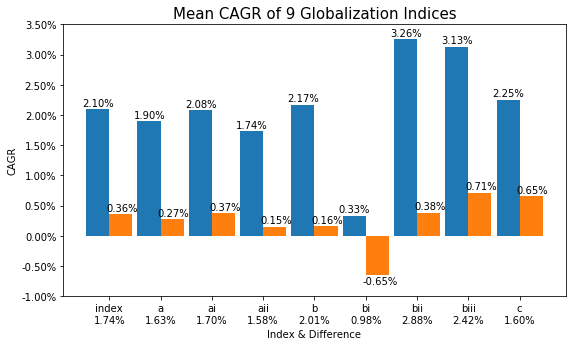

In [50]:
measure = 'Mean'
title = '{} CAGR of 9 Globalization Indices'.format(measure)
data = np.arange(18, dtype=np.float64).reshape(2,9)
for i, init in enumerate(initial_name):
    c = getattr(mod, 'ca_{}'.format(init))
    data[0,i], data[1,i]= c.calc_cagr(1991,2006,measure), c.calc_cagr(2007,2015,measure)
X = np.arange(9)
plt.figure(figsize=(9,5), facecolor='w')
for i in range(data.shape[0]):
    plt.bar(X+.45*i, data[i], width=.45)
    for x in X:
        if i == 0:
            x0 = x-.3
        else:
            x0 = x+.17
        if data[i][x] > 0:
            t = np.abs((min(data.flatten()) + max(data.flatten())))*.02
        else:
            t = -1*np.abs((min(data.flatten()) + max(data.flatten())))*.06
        plt.text(x=x0, y=data[i][x]+t,
                 s='{:.2f}%'.format(data[i][x]*100),
                 fontsize=10,
                 color='k')
# y_min, y_max = plt.ylim()
# plt.ylim(y_min-np.abs(y_min+y_max)*0.02, 
#          y_max+np.abs(y_min+y_max)*0.02)
plt.xticks(X+.225, [i+'\n{:.2f}%'.format(j*100) for i,j in zip(initial_name, data[0]-data[1])])
a,b = plt.yticks()
plt.yticks(ticks = a, labels=['{:.2f}%'.format(i*100) for i in a])
plt.title(title, fontsize=15)
plt.xlabel('Index & Difference')
plt.ylabel('CAGR')
# plt.savefig('./result/{}_cagr.png'.format(measure))
plt.show()

In [51]:
from pandas import ExcelWriter
import math
f = lambda sr : math.pow(sr.values[-1] / sr.values[0], 1 / (len(sr)-1))-1
g = lambda x : "%.2f" % (x*100) + "%"

full_name = ['Overall', 'Economic', 'actual_flows', 'restrictions', 'Social', 
 'personal_contact', 'information_flows', 'cultural_proximity', 'Political']
initial_name = ['index', 'a', 'ai', 'aii', 'b', 'bi', 'bii', 'biii', 'c']
income_di = {1:'Low',2:'Lower Middle',3:'Upper Middle',4:'High'}
region_di = {'EcaNa':'ECA&NA',"SaSsa":'SA&SSA',"Lac":'LAC',"Eap":'EAP',"Mena":'MENA'}

writer = ExcelWriter('globalization_measure.xlsx')
for i, content in zip(full_name, initial_name):
    measure = pd.DataFrame()
    ca_ = getattr(mod, 'ca_{}'.format(content))
    measure = pd.concat((measure, 
                    ca_.get_measure_table(name='{}({})'.format('Total', ca_.dof+1), measure='average')), 
                        axis=1)
    for gni in [4,3,2,1]:
        ca_ = getattr(mod, 'ca_{}_{}'.format(content, gni))
        measure = pd.concat((measure, 
                     ca_.get_measure_table(name='{}({})'.format(income_di[gni],ca_.dof+1), measure='average')), 
                    axis=1)
    for region in df.region.unique():
        ca_ = getattr(mod, 'ca_{}_{}'.format(content, region))
        measure = pd.concat((measure, 
                     ca_.get_measure_table(name='{}({})'.format(region_di[region],ca_.dof+1), measure='average')), 
                    axis=1)
        measure.loc['2013_CAGR'] = measure.iloc[:-4].astype(float).apply(f).apply(g).values
    measure.to_excel(writer, i+'('+content+')')
writer.save()

writer1 = ExcelWriter('globalization_income.xlsx')
for i, content in zip(full_name, initial_name):
    index = pd.DataFrame()
    ca_ = getattr(mod, 'ca_{}'.format(content))
    index = pd.concat((index, 
                     ca_.get_index_table2(name='{}({})'.format('Total', ca_.dof+1))), 
                      axis=1)
    for gni in [4,3,2,1]:
        ca_ = getattr(mod, 'ca_{}_{}'.format(content, gni))
        index = pd.concat((index, 
                     ca_.get_index_table2(name='{}({})'.format(income_di[gni],ca_.dof+1))), 
                          axis=1)
    index.loc['2013_CAGR'] = index.iloc[:-3].applymap(lambda x : float(x[:6])).apply(f).apply(g).values
    
    col = pd.MultiIndex(levels=[['Sigma', 'Gamma'], ['High(47)', 'Low(22)', 'Lower Middle(36)', 'Total(141)', 'Upper Middle(36)']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [3, 0, 4, 2, 1, 3, 0, 4, 2, 1]])
    index = index.swaplevel(0, 1, axis=1).sort_index(axis=1)[col]
    
    index.to_excel(writer1, i+'('+content+')')
writer1.save()

writer2 = ExcelWriter('globalization_region.xlsx')
for i, content in zip(full_name, initial_name):
    index1 = pd.DataFrame()
    for region in df.region.unique():
        ca_ = getattr(mod, 'ca_{}_{}'.format(content, region))
        index1 = pd.concat((index1, 
                     ca_.get_index_table2(name='{}({})'.format(region_di[region],ca_.dof+1))), axis=1)
    index1.loc['2013_CAGR'] = index1.iloc[:-3].applymap(lambda x : float(x[:6])).apply(f).apply(g).values
    
    col = pd.MultiIndex(levels=[['Sigma', 'Gamma'], ['EAP(16)', 'ECA&NA(43)', 'LAC(25)', 'MENA(14)', 'SA&SSA(43)']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]])
    index1 = index1.swaplevel(0, 1, axis=1).sort_index(axis=1)[col]
    
    index1.to_excel(writer2, i+'('+content+')')
writer2.save()

In [57]:
def plot_convergence(ca_li, year = None, measure='Normalize Index', xtick_size=False, figsize=(12,6.5), savefig=False, lgd_=False, **kwargs):
    fig = plt.figure(**kwargs)
    fig.set_size_inches(figsize)
    for ca_, info in ca_li.items():
        dof = ca_.dof
        if info[1].upper() == 'SIGMA':
            f, cagr = ca_.sigma, ca_.sigma_cagr
        elif info[1].upper() == 'GAMMA':
            f, cagr = ca_.gamma, ca_.gamma_cagr
        else:
            f, cagr = ca_.mean, ca_.mean_cagr
        if year:
            start, end = year
            f = f.loc[start:end]
        plt.plot(f, label="{}({})\nCAGR = {}%".format(info[0], dof+1, round(cagr*100,2)), **info[2])
    lgd = plt.legend(shadow=True, fancybox=True, loc="lower center", 
                     fontsize=10, bbox_to_anchor=(0.5,-0.2), ncol=len(ca_li))
    plt.ylabel(measure, size=12)
    plt.grid(True, axis='y', alpha=0.6)
    if xtick_size:
        plt.xticks(size=xtick_size)
    if savefig:
        plt.savefig(savefig, dpi=None, facecolor='w', 
                   edgecolor='w',orientation='portrait', 
                   papertype=None, format=None,transparent=False, 
                   bbox_inches="tight", pad_inches=0.1,
                   frameon=None,bbox_extra_artists=(lgd,))
    plt.show()

In [58]:
initial_name = ['index', 'a', 'ai', 'aii', 'b', 'bi', 'bii', 'biii', 'c']
full_name = ['Overall', 'Economic', 'actual_flows', 'restrictions', 'Social', 
 'personal_contact', 'information_flows', 'cultural_proximity', 'Political']
income = ['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income']
region = ['ECANA',"SASSA","LAC","EAP","MENA"]

In [59]:
setting = (
    dict(marker="D", mfc='none', ms=12, mew=2, lw=3, color=(0.2,0.2,1,1)),
    dict(marker="s", mfc='none', ms=12, mew=2, lw=3, color="#FF0000", linestyle="--"),
    dict(marker="^", mfc='none', ms=12, mew=2, lw=3, color=(0.9,0.7,0,1), linestyle="--"),
    dict(marker="o", mfc='none', ms=12, mew=2, lw=3, color=(0.5,0.7,0,1), linestyle="--"),
    dict(marker="4", mfc='none', ms=2, mew=15, lw=3, color="#FFBE0A", linestyle="--"),
    dict(marker="+", mfc='none', ms=2, mew=15, lw=3, color="#FFBE0A", linestyle="--"),
    dict(marker="x", mfc='none', ms=2, mew=15, lw=3, color=(0.9,0.7,0,1), linestyle="--")
)

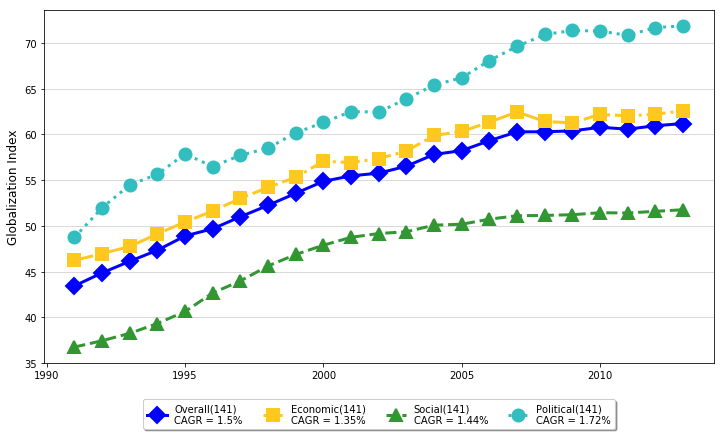

In [60]:
measure = 'Mean'
ca_li = {
    ca_index : ('Overall', measure, 
                dict(marker="D", ms=12, mew=2, lw=3, color="#0000FF")),
    ca_a : ('Economic', measure, 
                  dict(marker="s", ms=12, mew=2, lw=3, color="#FFC81E", ls='-.')),
    ca_b : ('Social', measure, 
                  dict(marker="^", ms=12, mew=2, lw=3, color="#329632", ls='--')),
    ca_c : ('Political', measure, 
                  dict(marker="o", ms=12, mew=2, lw=3, color="#32BEBE", ls=':'))
}
plot_convergence(ca_li, year=(1991,2013), 
                 measure='Globalization Index', figsize=(12,6.5), 
                 savefig=False, facecolor='w')

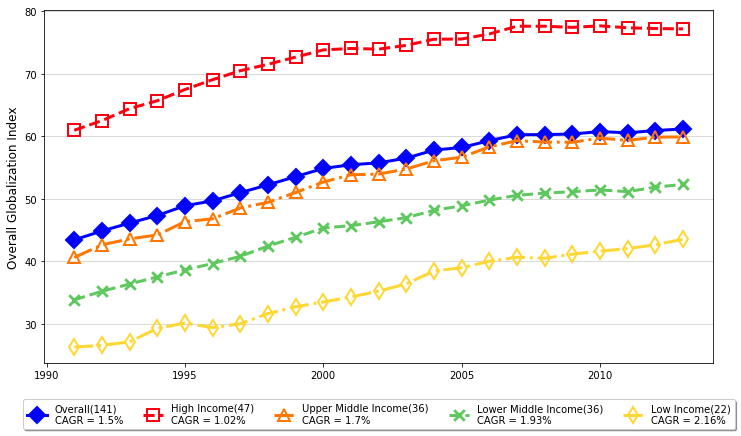

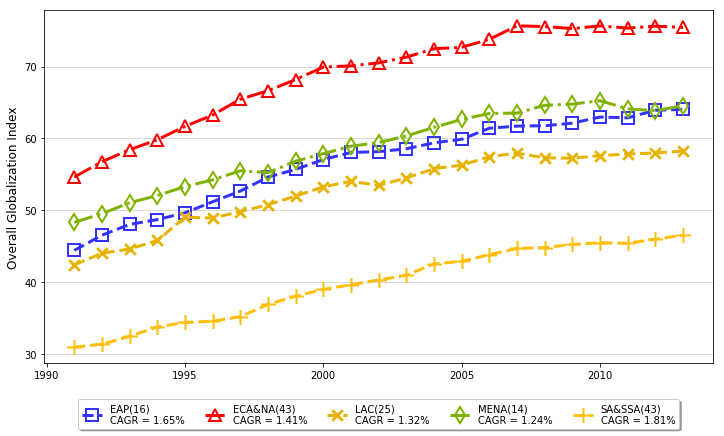

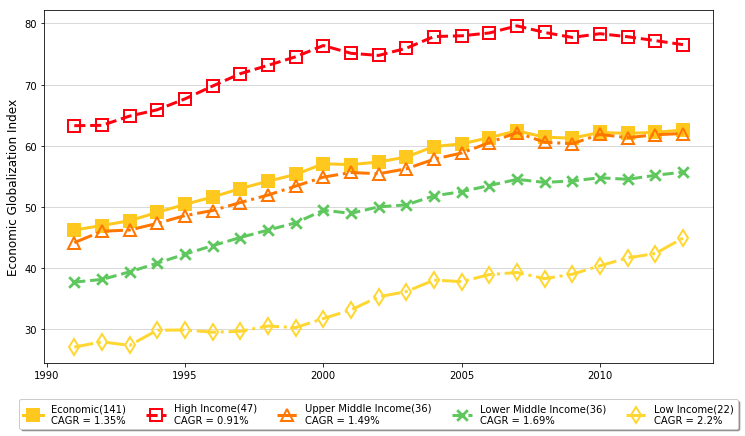

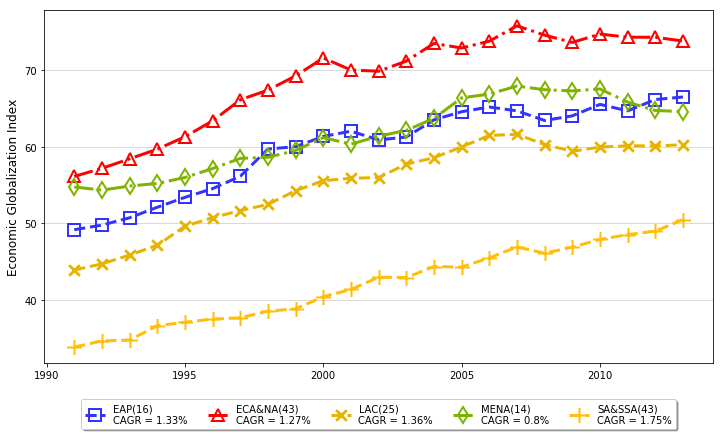

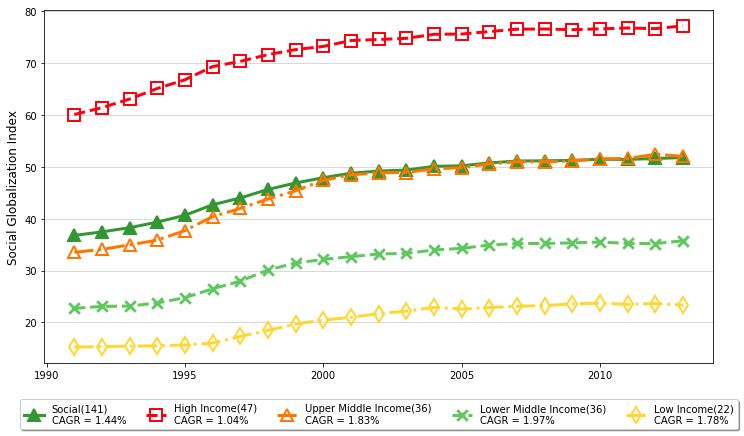

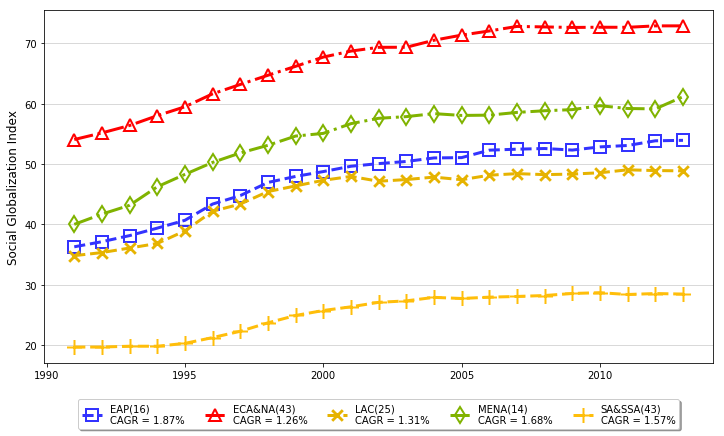

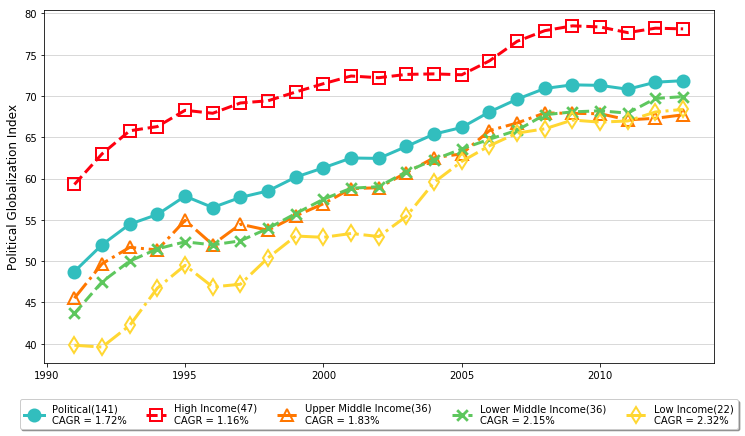

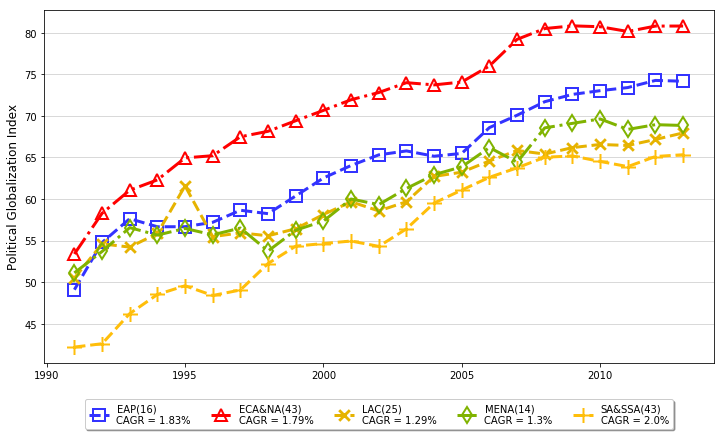

In [56]:
measure = 'Mean'
plot_set0 = iter(
             [dict(marker="D", ms=12, mew=2, lw=3, color="#0000FF"),
              dict(marker="s", ms=12, mew=2, lw=3, color="#FFC81E"),
              dict(marker="^", ms=12, mew=2, lw=3, color="#329632"),
              dict(marker="o", ms=12, mew=2, lw=3, color="#32BEBE")]
)
for index, name in zip(['index', 'a', 'b', 'c'],
                        ['Overall', 'Economic', 'Social', 'Political']):
    plot_set1 = iter(
         [dict(marker="s", mfc='none', ms=12, mew=2, lw=3, color="#FF0010",linestyle='--'),
         dict(marker="^", mfc='none', ms=12, mew=2, lw=3, color="#FF7700", linestyle="-."),
         dict(marker="x", mfc='none', ms=2, mew=15, lw=3, color="#5EC75E", linestyle="--"),
         dict(marker="d", mfc='none', ms=12, mew=2, lw=3, color="#FFD732", linestyle="-."),]
        )
    ca_li = {}
    ca_ = getattr(mod, 'ca_{}'.format(index))
    ca_li[ca_] = (name, measure, next(plot_set0))
    for gni, g_name in zip([4,3,2,1],
                   ['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income']):
        ca__ = getattr(mod, 'ca_{}_{}'.format(index, gni))
        ca_li[ca__] = (g_name, measure, next(plot_set1))
    plot_convergence(ca_li, year=(1991,2013), 
                     measure='{} Globalization Index'.format(name), figsize=(12,6.5), savefig=False)
    ca_li = {}
    plot_set2 = iter(
         [dict(marker="s", mfc='none', ms=12, mew=2, lw=3, color=(0.2,0.2,1,1),linestyle='--'),
         dict(marker="^", mfc='none', ms=12, mew=2, lw=3, color="#FF0000", linestyle="-."),
         dict(marker="x", mfc='none', ms=2, mew=15, lw=3, color=(0.9,0.7,0,1), linestyle="--"),
         dict(marker="d", mfc='none', ms=12, mew=2, lw=3, color=(0.5,0.7,0,1), linestyle="-."),
         dict(marker="+", mfc='none', ms=2, mew=15, lw=3, color="#FFBE0A", linestyle="--"),
         dict(marker="4", mfc='none', ms=2, mew=15, lw=3, color="#FFBE0A", linestyle="-.")]
        )
    for region, r_name in zip(['Eap','EcaNa','Lac','Mena','SaSsa'],
                              ['EAP', 'ECA&NA', 'LAC', 'MENA', 'SA&SSA']):
        ca_ = getattr(mod, 'ca_{}_{}'.format(index, region))
        ca_li[ca_] = (r_name, measure, next(plot_set2))
    plot_convergence(ca_li, year=(1991,2013), measure='{} Globalization Index'.format(name), figsize=(12,6.5), savefig=False)